In [162]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
depVariables=['m13a','m13d','m13g','m15m']
facAccuracies=[]
facPrecision=[]
facRecalls=[]
facDepth=[]
facLen=[]
facFeatures=pd.DataFrame()

In [163]:
#Get data from csv files
data = pd.read_csv('C:/Users/Leonards/Documents/Stuff/Book2.csv')
dataResults= pd.read_csv('C:/Users/Leonards/Documents/Stuff/Book3.csv')

In [164]:
#Get Standalone factors
CIC=data[['m09e1']].copy().rename(columns={'m09e1':'CIC'})
NPC=data[['m09o1']].copy().rename(columns={'m09o1':'NPC'})
ALC=data[['m17c1']].copy().rename(columns={'m17c1':'ALC'})

In [165]:
#Group variables into factors, perform standardization
transformer = FactorAnalysis(n_components=1, random_state=0)
TF_transformed = transformer.fit_transform(data[['m09a1','m09b1','m09d1','m09f1','m09g1','m09h1','m09i1','m09m1','m09n1']])
TF=pd.DataFrame(TF_transformed).rename(columns={0:'TF'}) #create a dataframe for new factor
transformer = FactorAnalysis(n_components=1, random_state=0)
IF_transformed = transformer.fit_transform(data[['m09s1','m09g1','m09c1']])
IF=pd.DataFrame(IF_transformed).rename(columns={0:'IF'}) #create a dataframe for new factor
transformer = FactorAnalysis(n_components=1, random_state=0)
ITF_transformed = transformer.fit_transform(data[['m21d','m21e','m21f','m06h1','m17e1']])
ITF=pd.DataFrame(ITF_transformed).rename(columns={0:'ITF'}) #create a dataframe for new factor
transformer = FactorAnalysis(n_components=1, random_state=0)
CF_transformed = transformer.fit_transform(data[['m11a1','m11a2','m11a3','m11a4','m17d1']])
CF=pd.DataFrame(CF_transformed).rename(columns={0:'CF'}) #create a dataframe for new factor
FinalData=pd.concat([CIC,NPC,ALC,TF,IF,ITF,CF],axis=1) #Combine all factors into one dataframe
#Standardize data
Final_standardized = (FinalData - FinalData.mean()) / FinalData.std()
Final_standardized

,CIC,NPC,ALC,TF,IF,ITF,CF
0,1.872563,1.872563,1.43753,3.234660,2.067655,2.694372,1.778118
1,-0.530560,-0.530560,-0.69112,-0.821584,-0.993993,-0.634432,-0.825347
2,-0.530560,-0.530560,1.43753,-0.342451,-0.993993,0.741150,0.472849
3,-0.530560,-0.530560,-0.69112,-0.485378,-0.993993,-0.634432,-0.302997
4,1.872563,1.872563,1.43753,0.654506,-0.069608,-0.634432,-0.635311
...,...,...,...,...,...,...,...
149,-0.530560,-0.530560,-0.69112,-0.946549,-0.993993,-0.786343,-1.157662
150,1.872563,-0.530560,-0.69112,-0.375605,-0.993993,-0.786343,1.778118
151,-0.530560,-0.530560,-0.69112,-0.946549,-0.993993,-0.634432,-0.825347
152,-0.530560,-0.530560,1.43753,-0.045929,-0.993993,-0.786343,-0.349965


In [166]:
from sklearn.model_selection import train_test_split
X_trainS, X_testS, y_trainS, y_testS=train_test_split(Final_standardized,dataResults,test_size=0.20,random_state=10)

In [182]:
DepVarName='m15m' # 'm13a' , 'm13d' , 'm13g' , 'm15m'
y_train=y_trainS[[DepVarName]].dropna()
X_train=X_trainS.loc[y_train.index]
y_test=y_testS[[DepVarName]].dropna()
X_test=X_testS.loc[y_test.index]

In [183]:
#Best model by depth
# Initialize lists to store metrics
max_depths = range(1, 21)  # Trying out depths from 1 to 20
accuracies = []
precisions = []
recalls = []

# Loop through different max_depth values
for depth in max_depths:
    clf = DecisionTreeClassifier(
            min_samples_split=2,
            min_samples_leaf=1,
            criterion='gini',
            max_features=None,  # or 'auto', 'sqrt', 'log2'
            splitter='best',
            max_depth=depth,
            ccp_alpha=0.01,
            random_state=42
        )
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    
    acc = accuracy_score(y_test, prediction)
    prec = precision_score(y_test, prediction,average='weighted', zero_division=1)
    rec = recall_score(y_test, prediction,average='weighted', zero_division=1)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'max_depth': max_depths,
    'accuracy': accuracies,
    'precision': precisions,
    'recall': recalls
})

print(results_df)

# Find the best depth based on accuracy, precision, and recall
best_accuracy_depth = max_depths[np.argmax(accuracies)]
best_precision_depth = max_depths[np.argmax(precisions)]
best_recall_depth = max_depths[np.argmax(recalls)]

print(f"Best max_depth for accuracy: {best_accuracy_depth} with accuracy: {accuracies[np.argmax(accuracies)]}")
print(f"Best max_depth for precision: {best_precision_depth} with precision: {precisions[np.argmax(precisions)]}")
print(f"Best max_depth for recall: {best_recall_depth} with recall: {recalls[np.argmax(recalls)]}")

# If you want to choose the best overall depth, you could average the ranks (or weights) of the metrics
average_scores = np.array(accuracies) + np.array(precisions) + np.array(recalls)
best_overall_depth = max_depths[np.argmax(average_scores)]

print(f"Best overall max_depth: {best_overall_depth} with combined score: {average_scores[np.argmax(average_scores)]}")


    max_depth  accuracy  precision    recall
0           1  0.866667   0.884444  0.866667
1           2  0.866667   0.884444  0.866667
2           3  0.800000   0.800000  0.800000
3           4  0.766667   0.829400  0.766667
4           5  0.766667   0.829400  0.766667
5           6  0.766667   0.829400  0.766667
6           7  0.766667   0.829400  0.766667
7           8  0.766667   0.829400  0.766667
8           9  0.766667   0.829400  0.766667
9          10  0.766667   0.829400  0.766667
10         11  0.766667   0.829400  0.766667
11         12  0.766667   0.829400  0.766667
12         13  0.766667   0.829400  0.766667
13         14  0.766667   0.829400  0.766667
14         15  0.766667   0.829400  0.766667
15         16  0.766667   0.829400  0.766667
16         17  0.766667   0.829400  0.766667
17         18  0.766667   0.829400  0.766667
18         19  0.766667   0.829400  0.766667
19         20  0.766667   0.829400  0.766667
Best max_depth for accuracy: 1 with accuracy: 0.8666666

In [184]:
MaxDepth=2
clf = DecisionTreeClassifier(
            min_samples_split=2,
            min_samples_leaf=1,
            criterion='gini',
            max_features=None,  # or 'auto', 'sqrt', 'log2'
            splitter='best',
            max_depth=MaxDepth,
            ccp_alpha=0.01,
            random_state=42
        )
clf=clf.fit(X_train,y_train)
prediction=clf.predict(X_test)

In [185]:
#Storing each version results into one dataset
facAccuracies.append(accuracy_score(y_test,prediction))
facPrecision.append(precision_score(y_test,prediction,average='weighted', zero_division=1))
facRecalls.append(recall_score(y_test,prediction,average='weighted', zero_division=1))
facDepth.append(MaxDepth)
facLen.append(len(X_train)+len(X_test))

In [186]:
facFeatures[[DepVarName]]=pd.DataFrame(clf.feature_importances_)
print(facFeatures)

       m13a      m13d      m13g     m15m
0  0.000000  0.000000  0.047559  0.00000
1  0.283072  0.000000  0.039497  0.00000
2  0.000000  0.345946  0.000000  0.70245
3  0.279363  0.000000  0.255472  0.29755
4  0.000000  0.000000  0.115393  0.00000
5  0.000000  0.654054  0.300605  0.00000
6  0.437565  0.000000  0.241474  0.00000


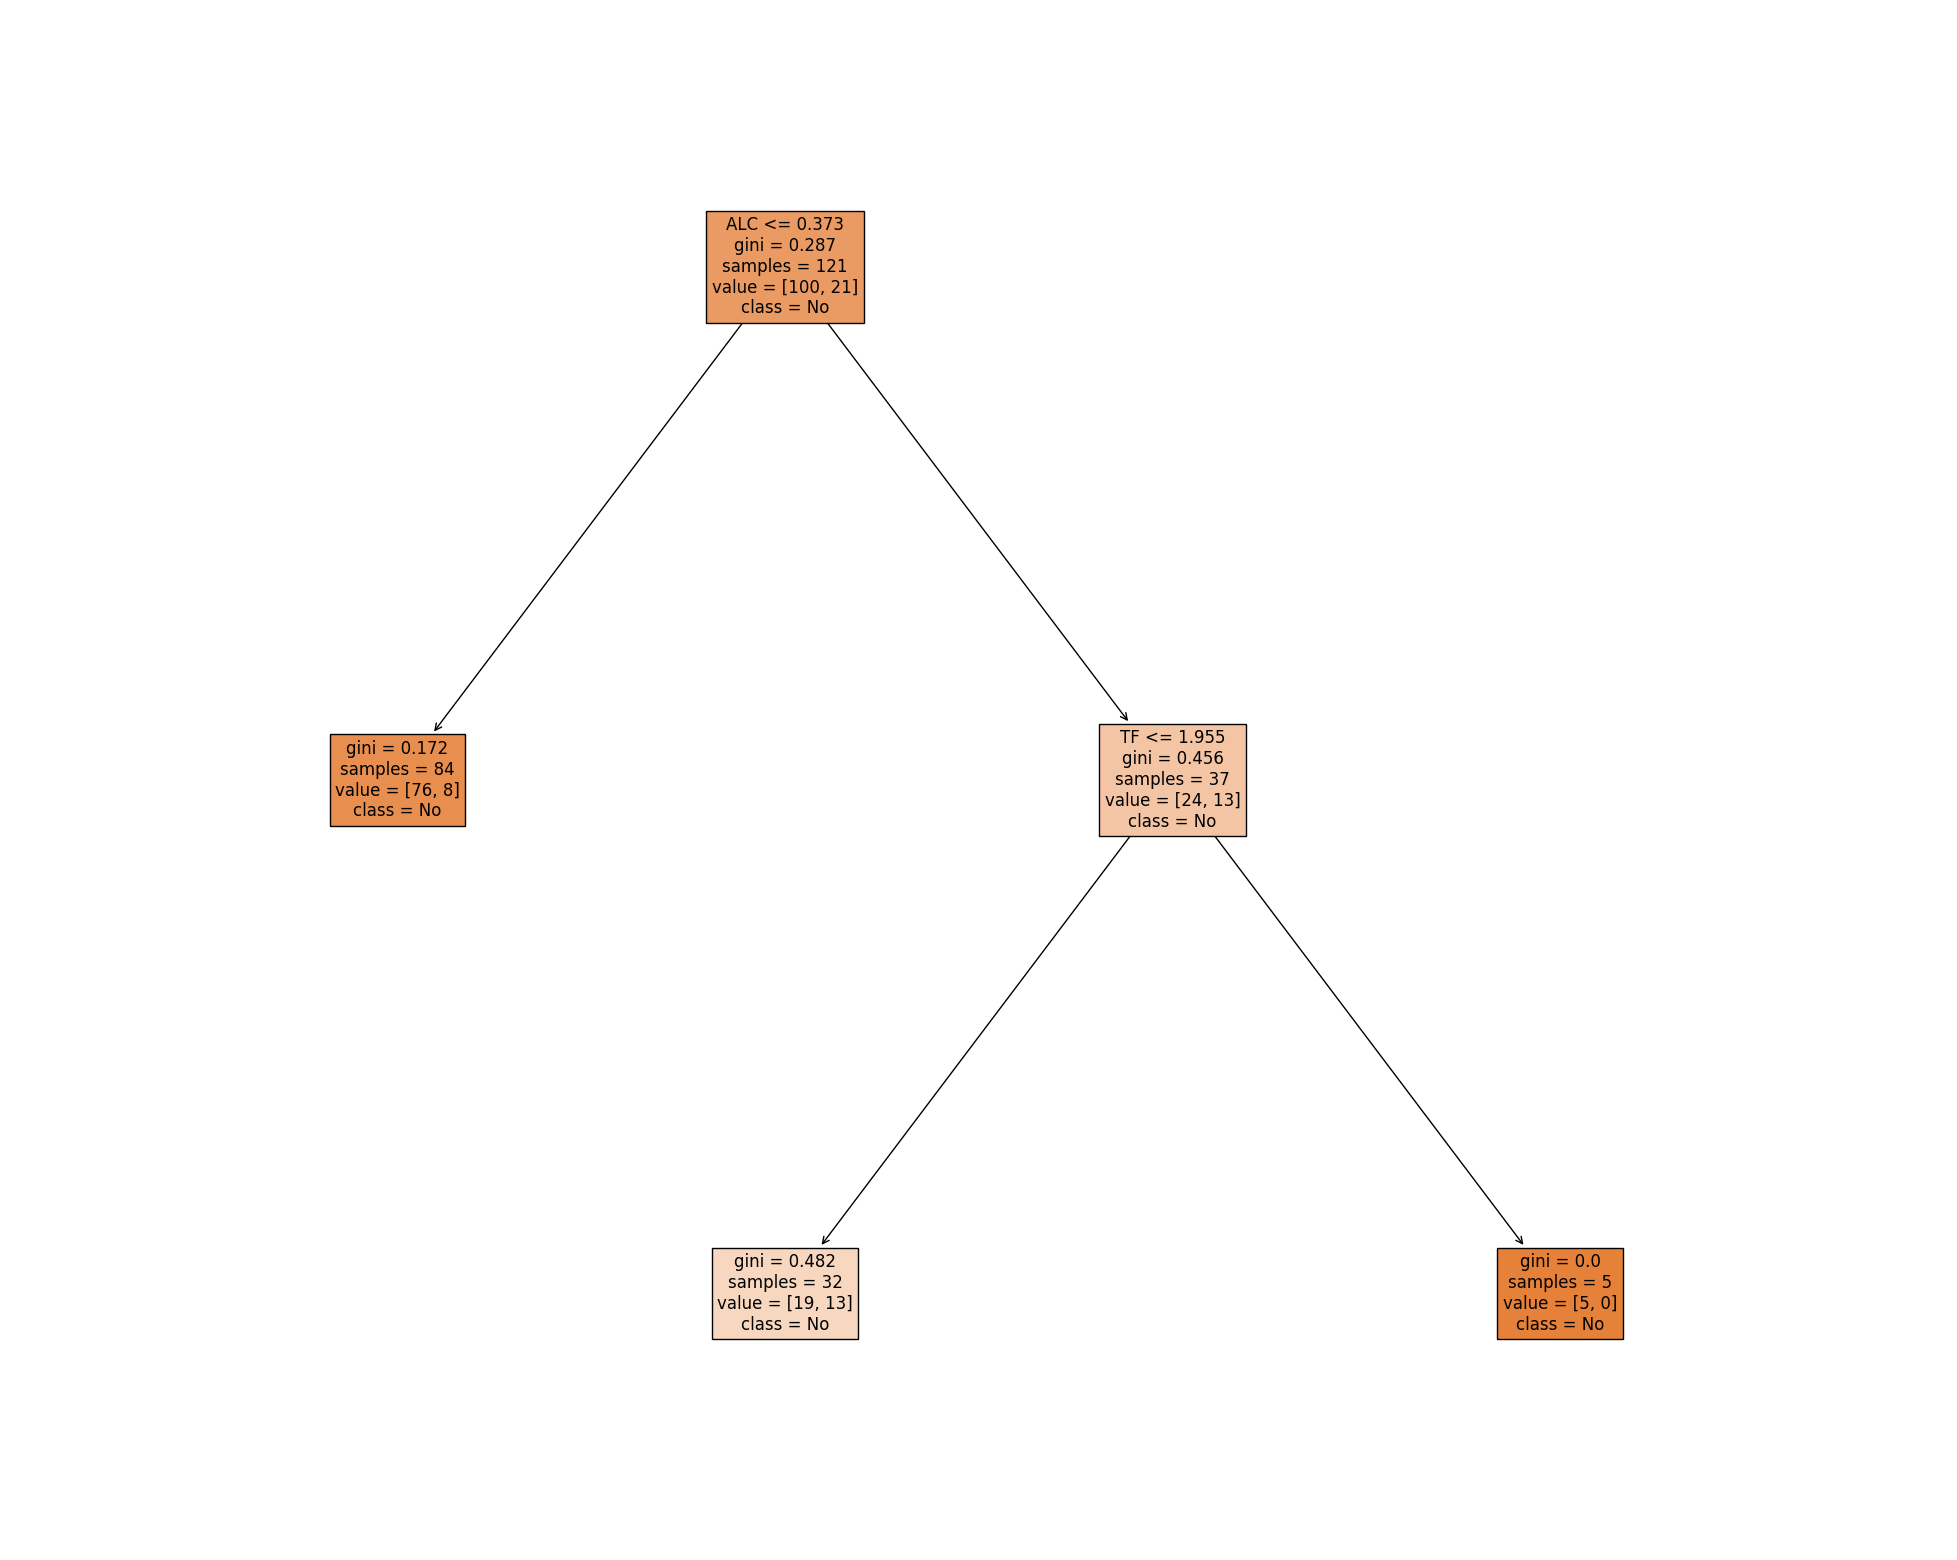

In [187]:
from sklearn import tree
from matplotlib import pyplot as plt
feature_names = X_train.columns
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'No', 1:'Yes'},
                   filled=True,
                  fontsize=12)

In [188]:
print("models evaluation")
print(pd.DataFrame({
     "Variables": depVariables,
    "Accuracy" : facAccuracies,
    "Precision" : facPrecision,
    "Recall" : facRecalls,
     "Depth" : facDepth,
    "Rows" : facLen
}))

models evaluation
  Variables  Accuracy  Precision    Recall  Depth  Rows
0      m13a  0.741935   0.683564  0.741935      2   154
1      m13d  0.916667   0.916667  0.916667      2   102
2      m13g  0.625000   0.644958  0.625000      7   101
3      m15m  0.866667   0.884444  0.866667      2   151
